<a href="https://www.kaggle.com/" target="_blank"><img align="left" alt="Kaggle - Jessica" title="Abrir no Kaggle (Jessica)" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

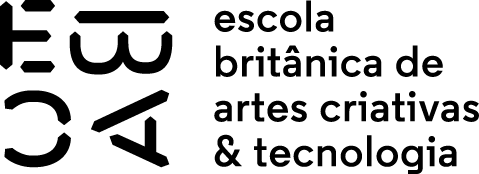


# Projeto Final de SQL – Módulo 8

Neste notebook, apresentamos uma análise exploratória do conjunto de dados de crédito, utilizando consultas SQL em Amazon Athena e visualização com pandas.

O objetivo é compreender o perfil dos clientes, identificar padrões de gastos e relacionar as variáveis demográficas com limites de crédito e transações.



# **SQL para Análise de Dados**
## **Módulo 8** | SQL: Projeto

Professora [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)<br>
Aluna Jessica Mitsuoka 

Data: 31 de julho de 2025.

# **Índice**

- [**0. Conjunto de dados**](#0.-Conjunto-de-dados)  

- [**1. Criação da tabela**](#1.-Criação-da-tabela)  

- [**2. EDA (Exploratory Data Analysis)**](#2.-EDA-(Exploratory-Data-Analysis))  

> - [2.1 Preview da tabela](#2.1-Preview-da-tabela)  

> - [2.2 Quantidade de linhas no dataset](#2.2-Quantidade-de-linhas-no-dataset)  

> - [2.3 Tipos de dados em cada coluna](#2.3-Tipos-de-dados-em-cada-coluna)  

> - [2.4.1 Categorias da variável *escolaridade*](#2.4.1-Categorias-da-variável-escolaridade)  
> - [2.4.2 Categorias da variável *estado_civil*](#2.4.2-Categorias-da-variável-estado_civil)  
> - [2.4.3 Categorias da variável *sexo*](#2.4.3-Categorias-da-variável-sexo)  

> - [2.5.1 Quantidade de clientes em cada faixa salarial](#2.5.1-Quantidade-de-clientes-em-cada-faixa-salarial)  
> - [2.5.2 Quantidade de clientes de acordo com cada tipo de cartão](#2.5.2-Quantidade-de-clientes-de-acordo-com-cada-tipo-de-cartão)  
> - [2.5.3 Quantidade de clientes de acordo com o sexo](#2.5.3-Quantidade-de-clientes-de-acordo-com-o-sexo)  

> - [2.6.1 Análise da idade dos clientes (média, mínima e máxima)](#2.6.1-Análise-da-idade-dos-clientes-(média,-mínima-e-máxima))  
> - [2.6.2 Análise dos gastos dos clientes (média, mínima e máxima)](#2.6.2-Análise-dos-gastos-dos-clientes-(média,-mínima-e-máxima))  

> - [2.7.1 Limite mínimo de crédito de acordo com o tipo de cartão, sexo e escolaridade](#2.7.1-Limite-mínimo-de-crédito-de-acordo-com-o-tipo-de-cartão,-sexo-e-escolaridade)  
> - [2.7.2 Limite máximo de crédito de acordo com o tipo de cartão, sexo e escolaridade](#2.7.2-Limite-máximo-de-crédito-de-acordo-com-o-tipo-de-cartão,-sexo-e-escolaridade)  

> - [2.8 Análise da quantidade e valores das transações de acordo com o sexo e estado civil](#2.8-Análise-da-quantidade-e-valores-das-transações-de-acordo-com-o-sexo-e-estado-civil)  

> - [2.9 Média da quantidade de transações, valor das transações e limite de crédito de acordo com o tipo de cartão e salário anual](#2.9-Média-da-quantidade-de-transações,-valor-das-transações-e-limite-de-crédito-de-acordo-com-o-tipo-de-cartão-e-salário-anual)  

- [**3. Conclusão**](#3.-Conclusão:)

# **0. Conjunto de dados**

O [conjunto de dados](credito8.csv) utilizado neste projeto consiste em uma subamostra do [dataset original](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/credito.csv) do professor André Perez. É importante destacar que pode haver discrepâncias nas proporções das categorias nesta amostra parcial em relação ao conjunto de dados original. Essa subamostra foi extraída com o objetivo de facilitar o processamento dos dados para o projeto em questão. Para acessar o dataset completo, você pode visitar o repositório GitHub do professor André Perez, disponível através do link: https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/credito.csv.

É válido ressaltar que as estimativas baseadas nesse conjunto de dados podem variar em relação ao conjunto completo.

| Coluna                   | Descrição                                               | Tipo     |
| :----------------------- | :-----------------------------------------------------: | -------: |
| **idade**                | idade do cliente                                        | *int*    | 
| **sexo**                 | sexo do cliente (F ou M)                                | *string* |
| **dependentes**          | número de dependentes do cliente                        | *int*    |
| **escolaridade**         | nível de escolaridade do clientes                       | *string* |
| **estado_civil**         | estado civil do cliente                                 | *string* |
| **salario_anual**        | faixa salarial do cliente                               | *string* |
| **tipo_cartao**          | tipo de cartao do cliente                               | *string* |
| **qtd_produtos**         | quantidade de produtos comprados nos últimos 12 meses   | *bigint* |
| **iteracoes_12m**        | quantidade de iterações/transacoes nos ultimos 12 meses | *int*    |
| **meses_inativo_12m**    | quantidade de meses que o cliente ficou inativo         | *int*    |
| **limite_credito**       | limite de credito do cliente                            | *float*  |
| **valor_transacoes_12m** | valor das transações dos ultimos 12 meses               | *float*  |
| **qtd_transacoes_12m**   | quantidade de transacoes dos ultimos 12 meses           | *int*    |

A tabela e as *queries* em linguagem SQL foram criadas através do [Amazon Athena](https://aws.amazon.com/pt/athena/) junto com o [Amazon Simple Storage Service (Amazon S3)](https://aws.amazon.com/pt/s3/).

[**Amazon Web Services**](https://aws.amazon.com/pt/), também conhecido como [**AWS**](https://aws.amazon.com/pt/), é uma plataforma de serviços de computação em nuvem, que formam uma plataforma de computação na nuvem oferecida pela Amazon.com.

In [1]:
# Import da biblioteca pandas para visualização dos arquivos CSV resultantes das queries

import pandas as pd

# **1. Criação da tabela**

A primeira etapa é a criação da tabela com o *dataset* armazenado no **Amazon S3 Bucket** por meio de uma *query* no **AWS Athena**, para posteriormente realizar as consultas.

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
	`idade` int,
	`sexo` string,
	`dependentes` int,
	`escolaridade` string,
	`estado_civil` string,
	`salario_anual` string,
	`tipo_cartao` string,
	`qtd_produtos` bigint,
	`iteracoes_12m` int,
	`meses_inativo_12m` int,
	`limite_credito` float,
	`valor_transacoes_12m` float,
	`qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
	'serialization.format' = ',',
	'field.delim' = ','
)
LOCATION 's3://bucket-jessica-transacoes/'
TBLPROPERTIES ('has_encrypted_data' = 'false');
```

# **2. EDA (Exploratory Data Analysis)**

## 2.1 Preview da tabela

> **Query 1:**

```sql
SELECT * FROM "default"."credito" limit 10;
```

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/credito8.csv')
df.head(10)

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


## 2.2 Quantidade de linhas no dataset

> **Query 2:**

```sql
SELECT COUNT(*) AS quantidade_linhas
FROM credito;
```

In [3]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query02.csv').shape[0]


,quantidade_linhas
0,2564


## 2.3 Tipos de dados em cada coluna

> **Query 3:**

```sql
DESCRIBE credito;
```

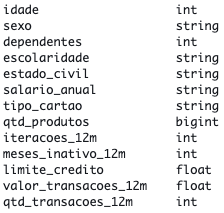

> Os tipos dos dados no *dataset* podem ser descritos como:
> - `int` representa dados do tipo inteiro (numérico);
> - `string` representa dados do tipo texto ou cadeia de caracteres;
> - `bigint` representa dados do tipo inteiro longo (um número inteiro maior do que o tipo int);
> - `float` representa dados do tipo número de ponto flutuante (um número com parte fracionária).

## 2.4.1 Categorias da variável `escolaridade`

> **Query 4:**

```sql
SELECT DISTINCT escolaridade
FROM credito;
```

In [4]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query04.csv')

,escolaridade
0,na
1,sem educacao formal
2,ensino medio
3,mestrado
4,graduacao
5,doutorado


> Podemos notar que há valores **nulos/ausentes** na variável categórica `escolaridade`, representados pelo valor **`na`**.

## 2.4.2 Categorias da variável `estado_civil`

> **Query 5:**

```sql
SELECT DISTINCT estado_civil
FROM credito;
```

In [5]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query05.csv')

,estado_civil
0,divorciado
1,na
2,casado
3,solteiro


> Também podemos notar a presença de valores nulos na variável categórica `estado_civil`.

## 2.4.3 Categorias da variável `sexo`

> **Query 6:**

```sql
SELECT DISTINCT sexo
FROM credito;
```

In [6]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query06.csv')

,sexo
0,F
1,M


> Diferente das demais colunas, não há valores nulos na variável categórica `sexo`.

## 2.5.1 Quantidade de clientes em cada faixa salarial

> **Query 7:**

```sql
SELECT salario_anual,
	COUNT(*) AS quantidade
FROM credito
GROUP BY salario_anual
ORDER BY CASE
		salario_anual
		WHEN 'menos que $40K' THEN 1
		WHEN '$40K - $60K' THEN 2
		WHEN '$60K - $80K' THEN 3
		WHEN '$80K - $120K' THEN 4
		WHEN '$120K +' THEN 5 ELSE 6
	END;
```

In [7]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query07.csv')

,salario_anual,quantidade
0,menos que $40K,701
1,$40K - $60K,467
2,$60K - $80K,451
3,$80K - $120K,488
4,$120K +,222
5,na,235


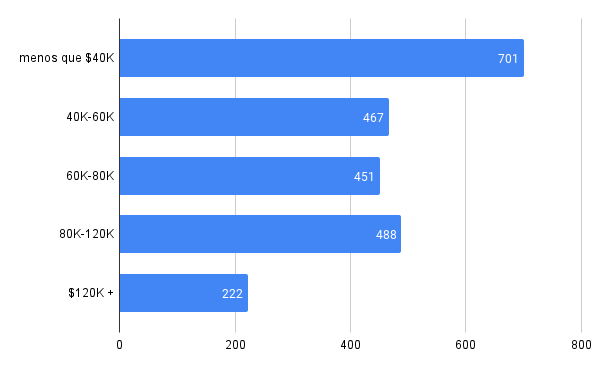

> Ao desconsiderar a presença dos 235 valores nulos na variável `salario_anual`, podemos observar que a maioria dos clientes recebem anualmente a quantia abaixo de \\$40.000,00 e a minoria acima de \\$120.000,00.

## 2.5.2 Quantidade de clientes de acordo com cada tipo de cartão

> **Query 8:**

```sql
SELECT tipo_cartao,
	COUNT(*) AS quantidade
FROM credito
GROUP BY tipo_cartao
ORDER BY quantidade DESC;
```

In [8]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query08.csv')

,tipo_cartao,quantidade
0,blue,2453
1,silver,93
2,gold,16
3,platinum,2


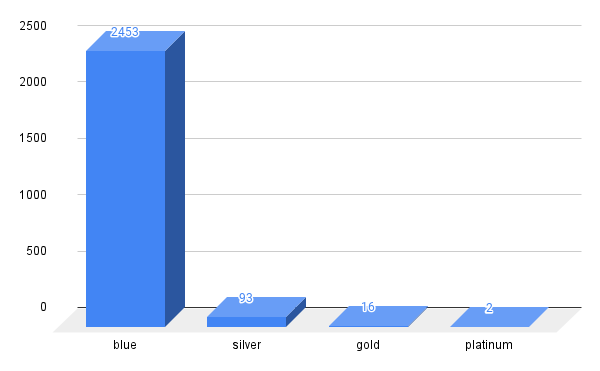

> A maioria possui o tipo de cartão *blue*, dando a entender que supostamente façam parte dos clientes com faixa de salário anual de menor valor.

## 2.5.3 Quantidade de clientes de acordo com o sexo

> **Query 9:**

```sql
SELECT sexo,
	COUNT(*) AS quantidade
FROM credito
GROUP BY sexo
ORDER BY quantidade DESC;
```

In [9]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query09.csv')

,sexo,quantidade
0,M,1563
1,F,1001


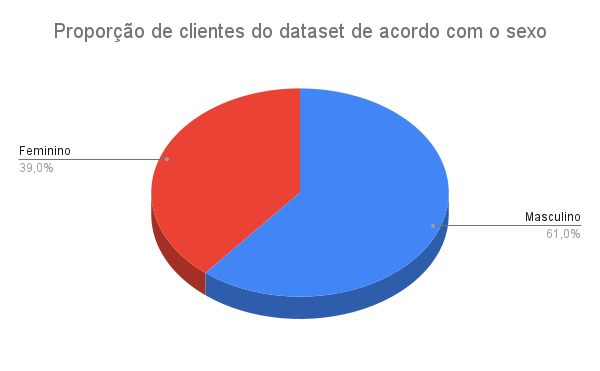

> Neste conjunto de dados, a proporção de clientes do sexo masculino e feminino não está equilibrada. Portanto é algo que deve ser levado em consideração ao relacionar esta variável com as demais.

## 2.6.1 Análise da idade dos clientes (média, mínima e máxima)

> **Query 10:**

```sql
SELECT ROUND(AVG(idade)) AS idade_media,
	MIN(idade) AS idade_minima,
	MAX(idade) AS idade_maxima
FROM credito;
```

In [10]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query10.csv')

,idade_media,idade_minima,idade_maxima
0,46.0,26,73


## 2.6.2 Análise dos gastos dos clientes (média, mínima e máxima)

> **Query 11:**

```sql
SELECT ROUND(AVG(valor_transacoes_12m), 2) AS valor_medio_transacoes,
	MIN(valor_transacoes_12m) AS valor_minimo_transacoes,
	MAX(valor_transacoes_12m) AS valor_maximo_transacoes
FROM credito;
```

In [11]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query11.csv')

,valor_medio_transacoes,valor_minimo_transacoes,valor_maximo_transacoes
0,1820.33,510.16,4776.58


## 2.7.1 Limite mínimo de crédito de acordo com o tipo de cartão, sexo e escolaridade

> **Query 12:**

```sql
SELECT COUNT(*) as quantidade,
	MIN(limite_credito) AS limite_credito_maximo,
	tipo_cartao,
	sexo,
	escolaridade
FROM credito
WHERE escolaridade != 'na'
GROUP BY sexo,
	escolaridade,
	tipo_cartao
ORDER BY limite_credito_maximo ASC;
```

In [12]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query12.csv')

,quantidade,limite_credito_minimo,tipo_cartao,sexo,escolaridade
0,91,1438.03,blue,F,graduacao
1,92,1438.04,blue,F,doutorado
2,133,1438.07,blue,M,doutorado
3,316,1438.08,blue,F,mestrado
4,148,1438.12,blue,F,sem educacao formal
5,190,1438.17,blue,F,ensino medio
6,203,1438.18,blue,M,sem educacao formal
7,330,1438.26,blue,M,ensino medio
8,158,1438.43,blue,M,graduacao
9,462,1438.45,blue,M,mestrado


## 2.7.2 Limite máximo de crédito de acordo com o tipo de cartão, sexo e escolaridade

> **Query 13:**

```sql
SELECT COUNT(*) as quantidade,
	MAX(limite_credito) AS limite_credito_maximo,
	tipo_cartao,
	sexo,
	escolaridade
FROM credito
WHERE escolaridade != 'na'
GROUP BY sexo,
	escolaridade,
	tipo_cartao
ORDER BY limite_credito_maximo DESC;
```

In [13]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query13.csv')

,quantidade,limite_credito_maximo,tipo_cartao,sexo,escolaridade
0,203,34516.99,blue,M,sem educacao formal
1,2,34516.98,gold,M,mestrado
2,462,34516.97,blue,M,mestrado
3,1,34516.96,platinum,F,doutorado
4,7,34516.96,silver,M,sem educacao formal
5,4,34516.95,gold,M,ensino medio
6,1,34516.94,gold,M,graduacao
7,1,34516.94,gold,F,graduacao
8,7,34516.89,silver,M,graduacao
9,330,34516.74,blue,M,ensino medio


É possível observar que não há uma relação considerável da variável `escolaridade` com o limite de crédito dos clientes. Os resultados dos limites mínimos de acordo com as separações categóricas demonstram que o tipo de cartão *blue* representa a maior parte dos limites mais baixos enquanto os demais representam os mais altos. 

A variável `sexo` demonstra que clientes do sexo masculino possuem limites máximos de crédito mais altos enquanto clientes do sexo feminino possuem limites máximos de crédito mais baixos.

## 2.8 Análise da quantidade e valores das transações de acordo com o sexo e estado civil

> **Query 14:**

```sql
SELECT COUNT(*) AS quantidade,
	sexo,
	estado_civil,
	MIN(valor_transacoes_12m) AS valor_minimo_transacoes,
	MAX(valor_transacoes_12m) AS valor_maximo_transacoes,
	AVG(valor_transacoes_12m) AS valor_medio_transacoes
FROM credito
WHERE estado_civil != 'na'
GROUP BY sexo,
	estado_civil
ORDER BY quantidade ASC;
```

In [14]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query14.csv')

,quantidade,sexo,estado_civil,valor_minimo_transacoes,valor_maximo_transacoes,valor_medio_transacoes
0,69,F,divorciado,1039.44,4370.80,2024.6688
1,92,M,divorciado,781.27,4605.89,1959.7296
2,308,F,solteiro,777.75,4776.58,2035.2687
3,458,M,solteiro,530.36,4686.93,1978.7189
4,591,F,casado,510.16,4740.94,1707.7339
5,930,M,casado,563.93,4542.69,1723.0211


> Nesta análise podemos notar que a quantidade de transações tem uma relação considerável com a variável `estado_civil`, sendo que a maior parte foi efetuada por clientes casados e a menor parte por clientes divorciados. Em contrapartida, a média de valor das transações também se diferencia de acordo com o estado civil mas de forma contrária, na qual a média mais alta são dos clientes divorciados e a média mais baixa são dos clientes casados, assim como pode ser constatado na relação dos valores mínimos de transações, dando a entender que a baixa quantidade de transações possívelmente tenha relação com o alto valor das mesmas.
>
> Em relação ao sexo do cliente, a variação não chega a ser tão grande, havendo somente uma leve discrepância entre os valores mínimos das transações, demonstrando ser mais alto entre clientes do sexo feminino que estão divorciadas. Já entre as categorias da variável `estado_civil`, observa-se que clientes solteiros e divorciados do sexo masculino efetuaram uma quantidade maior transações do que clientes do sexo feminino, porém a quantidade é um pouco maior entre clientes casados.

## 2.9 Média da quantidade de transações, valor das transações e limite de crédito de acordo com o tipo de cartão e salário anual

> **Query 15:**

```sql
SELECT COUNT(*) AS quantidade,
	tipo_cartao,
	salario_anual,
	ROUND(AVG(qtd_transacoes_12m)) AS media_qtd_transacoes,
	ROUND(AVG(valor_transacoes_12m), 2) AS media_valor_transacoes,
	ROUND(AVG(limite_credito), 2) AS media_limite_credito
FROM credito
WHERE salario_anual != 'na'
GROUP BY tipo_cartao,
	salario_anual
ORDER BY CASE
		tipo_cartao
		WHEN 'blue' THEN 1
		WHEN 'silver' THEN 2
		WHEN 'gold' THEN 3 ELSE 4
	END,
	CASE
		salario_anual
		WHEN 'menos que $40K' THEN 1
		WHEN '$40K - $60K' THEN 2
		WHEN '$60K - $80K' THEN 3
		WHEN '$80K - $120K' THEN 4
		WHEN '$120K +' THEN 5 ELSE 6
	END;
```

In [15]:
pd.read_csv('https://raw.githubusercontent.com/JessicaMitsuoka/exercicios-SQL-para-Analise-de-Dados-EBAC/refs/heads/main/Modulo%208%20-%20Projeto%20Final/dados/output/query15.csv')

,quantidade,tipo_cartao,salario_anual,media_qtd_transacoes,media_valor_transacoes,media_limite_credito
0,677,blue,menos que $40K,43.0,1857.24,3797.09
1,449,blue,$40K - $60K,42.0,1841.51,4832.76
2,431,blue,$60K - $80K,41.0,1814.45,8061.38
3,461,blue,$80K - $120K,40.0,1748.57,13736.87
4,212,blue,$120K +,40.0,1707.02,17105.39
5,20,silver,menos que $40K,45.0,2120.20,12007.81
6,17,silver,$40K - $60K,43.0,1776.94,17870.18
7,15,silver,$60K - $80K,39.0,1610.78,30351.36
8,22,silver,$80K - $120K,45.0,1910.17,34516.40
9,9,silver,$120K +,41.0,1611.85,32341.10


> Nesta análise podemos ver novamente a relação entre o limite de crédito com o tipo de cartão do cliente, sendo que as médias mais baixas de limite são dos clientes que possuem o tipo de cartão *blue*, aumentando de acordo com a faixa salarial anual. As demais médias de quantidade e valor das transações não possuem relação tão considerável com as variáveis deste resultado.

# **3. Conclusão:**

Ao longo da análise exploratória do conjunto de dados, foi possível identificar padrões relevantes no comportamento dos clientes e em seus perfis demográficos. Abaixo estão os principais destaques obtidos:

- Clientes com renda anual inferior a $40.000,00, em sua maioria, utilizam o cartão do tipo blue e possuem os menores limites de crédito. Por serem o grupo mais numeroso da base, estratégias de marketing voltadas a esse público podem alcançar maior alcance e impacto.

- Em relação ao gênero, observou-se que homens tendem a ter limites de crédito mais elevados do que mulheres. No entanto, é necessário considerar que a base analisada apresenta uma distribuição desigual entre os sexos, o que pode interferir nessa diferença.

- Pessoas casadas realizam a maior parte das transações, enquanto os clientes divorciados são menos ativos, embora realizem transações com valores médios mais altos. Isso sugere que há um perfil de consumo diferente entre esses grupos.

- Analisando a interação entre estado civil e gênero, percebe-se que homens solteiros e divorciados transacionam com mais frequência do que mulheres nas mesmas condições. Já entre os casados, essa diferença é menor. Esse padrão pode ser útil para ações de marketing mais segmentadas e assertivas.

- Os limites de crédito mais baixos estão associados ao cartão blue, mas em todos os tipos de cartão há uma correlação direta entre renda anual e limite médio de crédito. Isso mostra a importância de personalizar as ofertas com base na capacidade financeira de cada cliente.

Essas descobertas fornecem uma visão abrangente sobre o comportamento da base de clientes e abrem espaço para decisões mais bem direcionadas e estratégias comerciais mais eficazes.

**Para campanhas de marketing mais eficazes, recomenda-se priorizar os clientes casados, com cartão blue e renda anual abaixo de $40.000,00. Esse perfil representa uma parcela significativa da base e tende a responder bem a comunicações personalizadas. Focar nesse público pode otimizar recursos, aumentar o engajamento e trazer melhores resultados em aquisição e fidelização.**

[Voltar ao índice](#Índice)

---